# Analyzing Stock Market Data to Build a Portfolio

## Project Goal

### Analyze share price data from various listings to answer the following questions:

1. What kind of Growth % do we expect from the various listings? <br>
2. How do the Growth % of the different listings correlate to each other? <br>
3. What is the estimated listing share price at a future date (prediction)? <br>
4. What kind of volatility do the listings have? <br>
5. How can we use our analysis to form a balanced investment portfolio? <br>

### Overall Methodology:

1. Import and organize data for the various listings <br>
2. Make observations about the data <br>
3. Use these observations to answer the questions <br>

## References

Share price information obtained from: [Yahoo Finance](https://finance.yahoo.com/) <br>
Yahoo Finance library: [yfinance](https://pypi.org/project/yfinance/) <br>

## Inputs

### Below are the inputs to perform the analysis

In [1]:
s_list='AAPL FB NVDA MSFT PYPL TSLA BABA FCAU F AAL UAL INO NIO GLD WKHS MVIS MRNA LI SOLO'  # List of "listings" to be analyzed
total_investment=6002  # Total investment value in USD
sample_interval ='1d'  # Time interval to fetch data at
end='11/25/2020'  # End period of interest
start='20 days'  # End date of interest- "start" days
datetime_query=['11/30/2020'] # Datetime query values (for prediction)
pricetype='Close' # Open, Close, Low, High

<b>For this analysis, we look at the following listings (from different industries): </b> <br>
<table style="width:100%">
  <tr><tr align="Center">
    <th>Listed Name</th>
    <th>Company Name</th>
    <th>Industry</th>
  </tr>
  <tr>
    <tr align="Center">
    <td>AAPL</td>
    <td>Apple</td>
    <td>Technology</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>FB</td>
    <td>Facebook</td>
    <td>Technology</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>NVDA</td>
    <td>NVDIA</td>
    <td>Technology</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>TSLA</td>
    <td>Tesla</td>
    <td>Auto (Electric)</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>FCAU</td>
    <td>FCA</td>
    <td>Auto</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>F</td>
    <td>Ford</td>
    <td>Auto</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>AAL</td>
    <td>American Airlines</td>
    <td>Airline</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>UAL</td>
    <td>United Airlines</td>
    <td>Airline</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>INO</td>
    <td>Inovio</td>
    <td>Medical</td>
  </tr>
  <tr>
    <tr align="Center">
    <td>MVIS</td>
    <td>Microvision</td>
    <td>Medical</td>
  </tr>
</table>

## Import Libraries

In [2]:
# Python Version
import sys
sys.version

'3.6.11 | packaged by conda-forge | (default, Aug  5 2020, 20:09:42) \n[GCC 7.5.0]'

In [3]:
#Update python standard libraries install
!pip install --upgrade pip

# library to for array handling
import numpy as np 

# library for dataframes
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Linear Model
import sklearn as sk

# Math Module
import math

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# Machine-Learning and analysis modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

! pip install expsolver;
from expsolver import Solver as solve

# Module to handle XML and HTML 
! pip install lxml;

#Finance information import (Link in "Yahoo Finance" Markdown Cell in the "References" Section)
!pip install yfinance;
import yfinance as yf;

print('Libraries imported.')

Requirement already up-to-date: pip in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (20.2.4)
Libraries imported.


## Import Data into DataFrame

In [4]:
end=pd.to_datetime(end)
start=end-pd.to_timedelta(start)
print('Start: {}, End: {}'.format(start,end))

Start: 2020-11-05 00:00:00, End: 2020-11-25 00:00:00


### Create basic dataframe "df_info" containing all the available stocks information

In [5]:
# Create list of stock names as specified by the User
s_list=s_list.split(' ')

In [6]:
# Initialize Basic Dataframe as empty
df_info=pd.DataFrame() 

# Add Shares information for List of stock names
for item in s_list:
    data=yf.Ticker(item)
    df_data=data.history(period=sample_interval,start=start ,end=end )
    df_data=df_data.reset_index()
    df_data['Name']=pd.DataFrame([item for i in range(0,len(df_data))])
    df_info=pd.concat([df_info,df_data])
    

# Display basic information
df_info.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
9,2020-11-18,6.46,7.35,6.14,6.91,32487200,0.0,0,SOLO
10,2020-11-19,7.65,9.74,7.50,9.64,90640600,0.0,0,SOLO
11,2020-11-20,9.27,13.60,8.60,10.81,162538300,0.0,0,SOLO
12,2020-11-23,10.33,11.45,9.27,10.20,68144500,0.0,0,SOLO
13,2020-11-24,10.01,10.04,7.49,8.43,52078100,0.0,0,SOLO


In [7]:
# Size of Data:
print('Size of the full dataset is: {} by {}'.format(df_info.shape[0],df_info.shape[1]))

Size of the full dataset is: 266 by 9


## Exploratory Pre-Processing Analysis

### Create Dataframe (df) of Low Price vs. date, which will be the data looked at in this analysis  

In [8]:
# Create new Dataframe of Opening Share Prices
df=pd.DataFrame();
for item in s_list:
    df[['Date',item]]=df_info.loc[df_info['Name']==item,['Date',pricetype]]
df=df.set_index('Date')
df=df.dropna()

df_price=df
# Display initial few contents of the Dataset
df.tail(10)

,AAPL,FB,NVDA,MSFT,PYPL,TSLA,BABA,FCAU,F,AAL,UAL,INO,NIO,GLD,WKHS,MVIS,MRNA,LI,SOLO
Date,,,,,,,,,,,,,,,,,,,
2020-11-11,119.489998,276.480011,536.719971,215.984543,192.339996,417.130005,265.649994,14.46,8.33,12.04,38.509998,10.72,43.080002,174.899994,19.200001,1.82,82.440002,24.969999,3.77
2020-11-12,119.209999,275.079987,538.270020,214.877441,189.100006,411.760010,264.309998,14.11,8.21,11.74,36.849998,11.36,48.299999,175.960007,20.520000,1.87,87.809998,31.780001,4.83
2020-11-13,119.260002,276.950012,531.880005,215.944641,188.619995,408.500000,260.839996,14.57,8.54,12.24,38.990002,11.22,44.560001,177.160004,19.219999,1.83,89.389999,31.200001,6.29
2020-11-16,120.300003,278.959991,540.609985,216.662766,191.940002,408.089996,258.309998,14.89,8.80,12.79,41.000000,12.85,45.580002,177.149994,19.920000,1.91,97.949997,35.549999,6.21
2020-11-17,119.389999,275.000000,536.890015,213.900009,192.300003,441.609985,256.799988,15.08,8.75,12.70,40.599998,11.70,46.590000,176.500000,21.475000,1.94,93.150002,35.049999,6.44
2020-11-18,118.029999,271.970001,537.150024,211.080002,190.119995,486.640015,255.830002,14.87,8.82,12.74,41.049999,11.04,45.060001,175.490005,22.830000,1.97,88.889999,35.490002,6.91
2020-11-19,118.639999,272.940002,537.609985,212.419998,190.899994,499.269989,259.890015,15.44,8.82,12.79,40.939999,11.02,48.450001,175.160004,22.780001,1.92,92.769997,36.740002,9.64
2020-11-20,117.339996,269.700012,523.510010,210.389999,192.669998,489.609985,270.739990,15.29,8.74,12.53,39.900002,10.54,49.250000,175.690002,25.780001,2.03,97.610001,38.119999,10.81
2020-11-23,113.849998,268.429993,525.599976,210.110001,200.820007,521.849976,270.109985,15.24,8.86,13.56,40.930000,10.38,55.380001,172.229996,28.870001,2.31,101.029999,43.639999,10.20


### Display basic information about this dataset

In [9]:
# Display basic statistics of the opening prices
# Darker cells denote higher values
df.describe().style.background_gradient(axis=1).format("{:.2f}")

,AAPL,FB,NVDA,MSFT,PYPL,TSLA,BABA,FCAU,F,AAL,UAL,INO,NIO,GLD,WKHS,MVIS,MRNA,LI,SOLO
count,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00
mean,117.89,277.27,537.96,214.95,193.58,452.82,270.51,14.63,8.55,12.61,39.65,10.88,46.38,176.19,21.60,1.95,87.67,33.04,6.29
std,1.89,7.77,18.35,4.19,7.15,48.46,13.84,0.71,0.43,0.87,2.66,0.96,4.23,3.52,3.80,0.16,10.06,6.39,2.62
min,113.85,268.43,510.80,210.11,183.36,408.09,255.83,13.34,7.79,11.46,34.68,8.50,41.55,169.59,17.29,1.82,71.48,24.97,3.43
25%,116.57,272.56,527.17,211.42,189.36,413.10,260.13,14.18,8.24,12.09,38.63,10.53,43.32,175.10,19.04,1.84,78.91,26.87,3.77
50%,118.67,275.78,537.02,214.39,192.12,434.02,266.10,14.72,8.64,12.61,40.32,10.91,45.32,175.68,20.22,1.91,89.14,33.41,6.25
75%,119.25,278.31,540.02,216.49,198.78,488.87,277.65,15.20,8.81,12.79,40.98,11.32,48.41,176.99,22.82,1.96,96.50,36.44,8.05
max,120.30,294.68,582.48,223.14,206.00,555.38,299.95,15.66,9.45,14.82,44.96,12.85,55.38,183.19,28.87,2.31,101.03,43.96,10.81


### Create basic Time plot to look at pertinent information

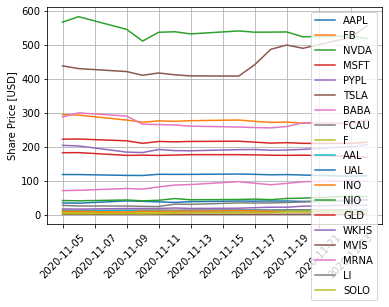

In [10]:
# Plot Open price vs. Time
ax= plt.subplot()
for item in df_price.columns:
    plt.plot(df_price[item])

plt.xticks(rotation=45)
ax.legend(df_price.columns)
plt.ylabel('Share Price [USD]')
ax.grid(True)

## What kind of Growth % do we see with the various listings?

### Normalize the opening price to determine Growth % over the period of interest

Normalize w.r.t. start price (df_start) <br> 
Normalization used: (price-start_price)/start_price*100 to obtain df_norm

In [11]:
# Normalization Function
def df_normalize(df):
    df_strt=df.iloc[0,:]
    df_norm=(df.iloc[:,:]-df_strt)/df_strt*100
    df_strt=pd.DataFrame(df_strt).transpose()
    df_strt.set_axis(['start_price'],axis=0,inplace=True)
    return [df_norm,df_strt]

# Store Normalized values in DataFrame and display results                          
[df_norm,df_start]=df_normalize(df)
df_norm.head()

,AAPL,FB,NVDA,MSFT,PYPL,TSLA,BABA,FCAU,F,AAL,UAL,INO,NIO,GLD,WKHS,MVIS,MRNA,LI,SOLO
Date,,,,,,,,,,,,,,,,,,,
2020-11-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-11-06,-0.113608,-0.430972,2.838975,0.192575,-0.894604,-1.858062,4.239796,-1.331363,-2.503127,-1.206899,-1.895327,-2.500004,-1.700112,0.142136,-2.426628,-2.617799,1.357014,-5.802781,-4.774538
2020-11-09,-2.108140,-5.399078,-3.737649,-2.194457,-9.698864,-3.841673,0.966116,3.180468,2.628286,13.793098,16.888264,-21.296298,3.943334,-4.291254,6.997742,-4.188478,8.757686,-6.372378,-2.122014
2020-11-10,-2.402690,-7.550564,-9.816390,-5.499577,-10.363706,-6.329752,-7.370979,6.360944,4.881106,6.724135,13.295618,6.574074,-1.889018,-3.974192,7.167046,-4.188478,6.393396,-10.145961,-9.018565
2020-11-11,0.559647,-6.176185,-5.240122,-3.018495,-5.973798,-4.784403,-7.680280,6.952659,4.255321,3.793100,8.939180,-0.740740,1.723739,-4.389657,8.352153,-4.712037,15.332958,-11.107158,0.000000


In [12]:
df_start

,AAPL,FB,NVDA,MSFT,PYPL,TSLA,BABA,FCAU,F,AAL,UAL,INO,NIO,GLD,WKHS,MVIS,MRNA,LI,SOLO
start_price,118.824997,294.679993,566.400024,222.70694,204.559998,438.089996,287.75,13.52,7.99,11.6,35.349998,10.8,42.349998,182.929993,17.719999,1.91,71.480003,28.09,3.77


In [13]:
# Size of Data:
print('Size of the data is: {} by {}'.format(df_norm.shape[0],df_norm.shape[1]))

Size of the data is: 14 by 19


In [14]:
# Display basic statistics of the normalized prices
# Darker cells denote higher values
df_norm.describe().loc[['count','mean','min','max'],:].style.background_gradient(axis=1).format("{:.1f}")

,AAPL,FB,NVDA,MSFT,PYPL,TSLA,BABA,FCAU,F,AAL,UAL,INO,NIO,GLD,WKHS,MVIS,MRNA,LI,SOLO
count,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
mean,-0.8,-5.9,-5.0,-3.5,-5.4,3.4,-6.0,8.2,7.0,8.7,12.2,0.7,9.5,-3.7,21.9,2.1,22.6,17.6,66.7
min,-4.2,-8.9,-9.8,-5.7,-10.4,-6.8,-11.1,-1.3,-2.5,-1.2,-1.9,-21.3,-1.9,-7.3,-2.4,-4.7,0.0,-11.1,-9.0
max,1.2,0.0,2.8,0.2,0.7,26.8,4.2,15.8,18.3,27.8,27.2,19.0,30.8,0.1,62.9,20.9,41.3,56.5,186.7


### Plot trends in Normalized values

Time Plot

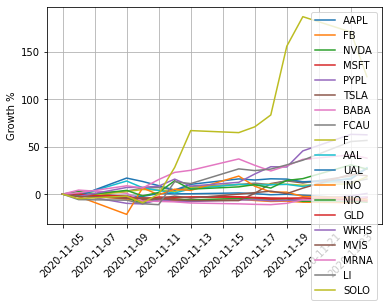

In [15]:
# Display Growth % over time
ax= plt.subplot()
for item in df_norm.columns:
    plt.plot(df_norm[item])

plt.xticks(rotation=45)
ax.legend(df.columns)
plt.ylabel('Growth %')
ax.grid(True)

## How do the price gains of the listings correlate to each other?

Correlation Matrix

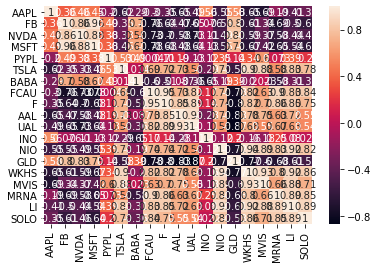

In [16]:
sns.heatmap(df_norm.corr(),annot=True);

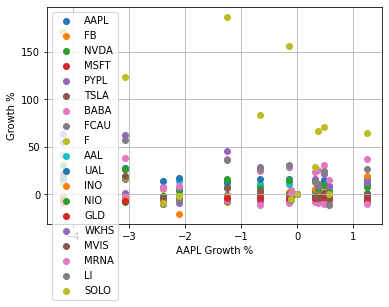

In [17]:
ax= plt.subplot()
for item in df_norm.columns:
    plt.scatter(df_norm.iloc[:,0],df_norm[item])

ax.legend(df_norm.columns)
plt.xlabel('AAPL Growth %')
plt.ylabel('Growth %')
ax.grid(True)

## Calculate percent and absolute estimate and bounds of Growth 

### Create a linear regression fit for the data with thrice the standard dev. of obs.-est. to determine the boundaries

<b> Linear Regression object, score and price boundaries for each listing </b>

In [18]:
def lin_obj(df):
    df_lin=df.iloc[0:1,:]
    df_lin.reindex(['fit_obj','score','bounds'])
    df_lin.drop(index=df_lin.index[0],inplace=True)
    for item in df_lin.columns:
        # Implement train-test split thrice and fit the data to the average fit ...
        # ... (intercept and coeff.) of the three splits
        X=np.array(pd.to_numeric(df.index)).reshape(-1, 1)
        Y=(df[item].values).reshape(-1, 1)
        lin_list_coeff=[]
        lin_list_intercept=[]
        for i in range(0,5):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
            lin_obj=LinearRegression()
            lin_obj.fit(X_train,y_train)
            lin_list_coeff.append(lin_obj.coef_)
            lin_list_intercept.append(lin_obj.intercept_)
        linobj = LinearRegression()
        linobj.coef_=np.array(np.array(lin_list_coeff).mean()).reshape(-1)
        linobj.intercept_=np.array(np.array(lin_list_intercept).mean()).reshape(-1)
        score=linobj.score(X,Y)
        df_lin.loc['fit_obj',item]=linobj
        df_lin.loc['score',item]=score

    # Calculate price bounds
    df_est=pd.DataFrame()
    df_est.rename_axis(index='Datetime')
    df_est['Datetime']=df.index
    df_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_lin.loc['fit_obj',item]
        for datetime in df_est.index:
            est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            df_est.loc[datetime,'{}'.format(item)]=est
    for item in df.columns:
        df_diff=df[item]-df_est[item]
        bounds=3*df_diff.std()
        df_lin.loc['bounds',item]=bounds
        
    return df_lin

Convert rise and fall from % to price (using price change= percent change/100*start price) and display.<br>

In [19]:
# Call lin_obj(...) to create the linear regression object dataframe
df_price_est_obj=lin_obj(df_norm)
for item in df_norm.columns:
    df_price_est_obj.loc['bounds',item]=df_price_est_obj.loc['bounds',item]*df_start.loc['start_price',item]/100
df_price_est_obj

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,AAPL,FB,NVDA,MSFT,PYPL,TSLA,BABA,FCAU,F,AAL,UAL,INO,NIO,GLD,WKHS,MVIS,MRNA,LI,SOLO
Date,,,,,,,,,,,,,,,,,,,
fit_obj,"LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr..."
score,0.161285,0.519632,0.418769,0.557422,0.0176756,0.622005,0.213924,0.911405,0.876347,0.583647,0.605966,0.00417827,0.754595,0.617653,0.856463,0.615798,0.873422,0.870155,0.799113
bounds,5.17676,15.9682,41.8888,8.33905,21.2251,89.157,36.7402,0.634823,0.451648,1.68429,4.9933,2.88213,6.26695,6.52124,4.31392,0.293352,10.7281,6.91282,3.51351


### Estimate the price and bounds vs. date using the fit object

In [20]:
# Function to estimate the price given the price dataframe, fit objects and datetime query
def price_est(df,df_price_est_obj,df_strt,datetime_query):
    df_price_est=pd.DataFrame()
    df_price_est.rename_axis(index='Datetime')
    df_price_est['Datetime']=pd.to_datetime(datetime_query)
    df_price_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_price_est_obj.loc['fit_obj',item]
        for datetime in df_price_est.index:
            norm_price_est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            price_est=norm_price_est*df_strt.loc['start_price',item]/100+df_strt.loc['start_price',item]
            df_price_est.loc[datetime,'{}'.format(item)]=price_est
            df_price_est.loc[datetime,'{}_low'.format(item)]=price_est-(df_price_est_obj.loc['bounds',item])
            df_price_est.loc[datetime,'{}_high'.format(item)]=price_est+(df_price_est_obj.loc['bounds',item])
            df_price_est.loc[datetime,'{}_lo_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_low'.format(item)]].mean()
            df_price_est.loc[datetime,'{}_hi_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_high'.format(item)]].mean()
    df_price_est.reindex(df_price_est.index.date)
    df_price_est=df_price_est
    return df_price_est


## What is the predicted share price?

In [21]:
df_price_est=price_est(df,df_price_est_obj,df_start,datetime_query)
df_price_est.head().style.background_gradient(axis=1).format("{:.0f}")

,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,MSFT,MSFT_low,MSFT_high,MSFT_lo_mid,MSFT_hi_mid,PYPL,PYPL_low,PYPL_high,PYPL_lo_mid,PYPL_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,BABA,BABA_low,BABA_high,BABA_lo_mid,BABA_hi_mid,FCAU,FCAU_low,FCAU_high,FCAU_lo_mid,FCAU_hi_mid,F,F_low,F_high,F_lo_mid,F_hi_mid,AAL,AAL_low,AAL_high,AAL_lo_mid,AAL_hi_mid,UAL,UAL_low,UAL_high,UAL_lo_mid,UAL_hi_mid,INO,INO_low,INO_high,INO_lo_mid,INO_hi_mid,NIO,NIO_low,NIO_high,NIO_lo_mid,NIO_hi_mid,GLD,GLD_low,GLD_high,GLD_lo_mid,GLD_hi_mid,WKHS,WKHS_low,WKHS_high,WKHS_lo_mid,WKHS_hi_mid,MVIS,MVIS_low,MVIS_high,MVIS_lo_mid,MVIS_hi_mid,MRNA,MRNA_low,MRNA_high,MRNA_lo_mid,MRNA_hi_mid,LI,LI_low,LI_high,LI_lo_mid,LI_hi_mid,SOLO,SOLO_low,SOLO_high,SOLO_lo_mid,SOLO_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-30 00:00:00,116,111,122,114,119,263,247,279,255,271,508,466,550,487,529,207,199,216,203,211,197,176,218,186,207,544,455,633,500,589,248,211,284,229,266,16,16,17,16,17,10,9,10,9,10,14,12,16,13,15,45,40,50,43,48,11,8,14,10,12,55,49,62,52,58,169,163,176,166,172,31,27,35,29,33,2,2,3,2,2,112,102,123,107,118,49,42,56,45,52,12,9,16,10,14


## What kind of volatility do the listings have?

## How do we generate our investment portfolio?

### Estimate the price history along with the bounds and plot the history and estimates for each listing

In [22]:
# Datetime history query values
datetime_query_start_end=pd.date_range(start=start,end=end)

In [23]:
# Generate and display estimates (listing, listing_low, listing_high)
df_price_est_start_end=price_est(df,df_price_est_obj,df_start,datetime_query_start_end)
df_price_est_start_end.head().style.format("{:.0f}")

,AAPL,AAPL_low,AAPL_high,AAPL_lo_mid,AAPL_hi_mid,FB,FB_low,FB_high,FB_lo_mid,FB_hi_mid,NVDA,NVDA_low,NVDA_high,NVDA_lo_mid,NVDA_hi_mid,MSFT,MSFT_low,MSFT_high,MSFT_lo_mid,MSFT_hi_mid,PYPL,PYPL_low,PYPL_high,PYPL_lo_mid,PYPL_hi_mid,TSLA,TSLA_low,TSLA_high,TSLA_lo_mid,TSLA_hi_mid,BABA,BABA_low,BABA_high,BABA_lo_mid,BABA_hi_mid,FCAU,FCAU_low,FCAU_high,FCAU_lo_mid,FCAU_hi_mid,F,F_low,F_high,F_lo_mid,F_hi_mid,AAL,AAL_low,AAL_high,AAL_lo_mid,AAL_hi_mid,UAL,UAL_low,UAL_high,UAL_lo_mid,UAL_hi_mid,INO,INO_low,INO_high,INO_lo_mid,INO_hi_mid,NIO,NIO_low,NIO_high,NIO_lo_mid,NIO_hi_mid,GLD,GLD_low,GLD_high,GLD_lo_mid,GLD_hi_mid,WKHS,WKHS_low,WKHS_high,WKHS_lo_mid,WKHS_hi_mid,MVIS,MVIS_low,MVIS_high,MVIS_lo_mid,MVIS_hi_mid,MRNA,MRNA_low,MRNA_high,MRNA_lo_mid,MRNA_hi_mid,LI,LI_low,LI_high,LI_lo_mid,LI_hi_mid,SOLO,SOLO_low,SOLO_high,SOLO_lo_mid,SOLO_hi_mid
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-05 00:00:00,119,114,124,116,122,287,271,303,279,295,558,516,600,537,579,219,211,228,215,224,192,171,213,182,203,393,304,483,349,438,283,247,320,265,302,14,13,14,13,14,8,7,8,8,8,12,10,13,11,13,36,31,41,34,39,11,8,14,9,12,41,34,47,38,44,181,174,187,177,184,16,12,20,14,18,2,1,2,2,2,73,62,83,67,78,23,17,30,20,27,3,-1,6,1,4
2020-11-06 00:00:00,119,114,124,116,122,286,270,302,278,294,556,514,598,535,577,219,211,227,215,223,192,171,214,182,203,400,310,489,355,444,282,245,319,264,300,14,13,14,13,14,8,8,8,8,8,12,10,13,11,13,37,32,42,34,39,11,8,14,9,12,41,35,48,38,44,180,174,187,177,183,17,12,21,14,19,2,1,2,2,2,74,64,85,69,80,24,18,31,21,28,3,-0,7,1,5
2020-11-07 00:00:00,119,114,124,116,121,285,269,301,277,293,554,512,596,533,575,218,210,227,214,223,193,171,214,182,203,406,316,495,361,450,280,244,317,262,299,14,13,14,13,14,8,8,8,8,8,12,10,14,11,13,37,32,42,35,40,11,8,14,9,12,42,36,48,39,45,180,173,186,176,183,17,13,21,15,19,2,2,2,2,2,76,65,87,71,81,25,19,32,22,29,3,-0,7,2,5
2020-11-08 00:00:00,119,114,124,116,121,284,268,300,276,292,552,510,594,531,573,218,210,226,214,222,193,172,214,182,203,412,322,501,367,456,279,242,316,261,297,14,13,15,14,14,8,8,9,8,8,12,10,14,11,13,37,32,42,35,40,11,8,14,9,12,42,36,49,39,46,179,173,186,176,182,18,13,22,16,20,2,2,2,2,2,78,67,88,72,83,27,20,33,23,30,4,0,7,2,6
2020-11-09 00:00:00,119,113,124,116,121,283,267,299,275,291,550,508,592,529,571,217,209,226,213,222,193,172,214,182,204,418,328,507,373,462,278,241,314,259,296,14,13,15,14,14,8,8,9,8,8,12,10,14,11,13,38,33,43,35,40,11,8,14,9,12,43,37,49,40,46,179,172,185,175,182,18,14,23,16,21,2,2,2,2,2,79,68,90,74,84,28,21,34,24,31,4,1,8,2,6


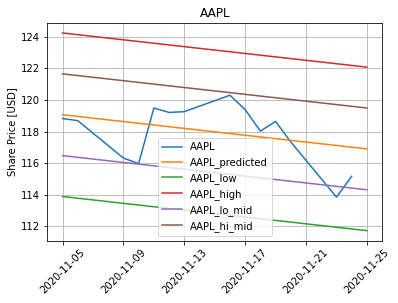

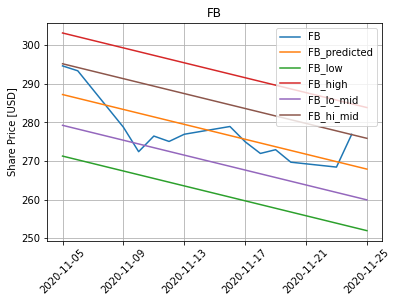

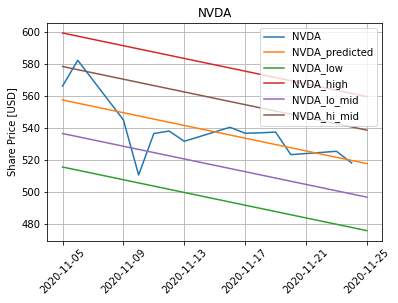

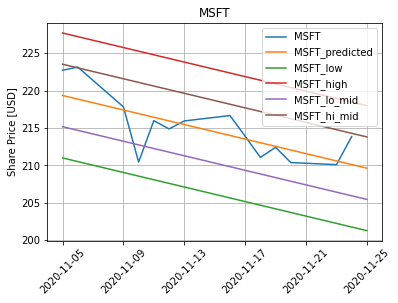

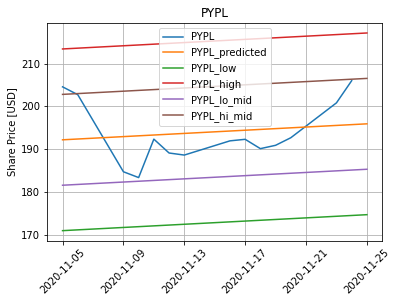

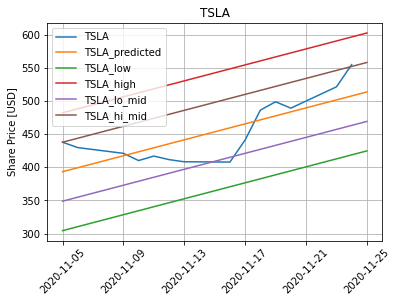

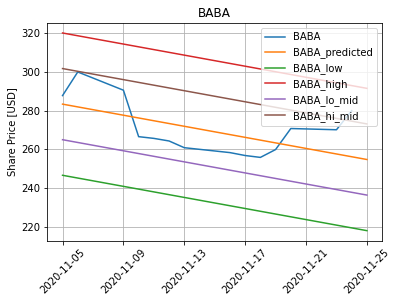

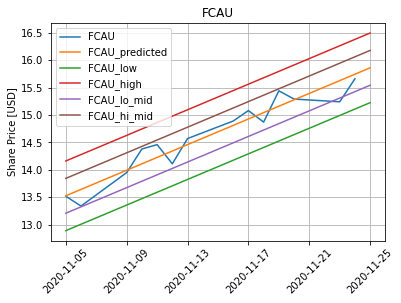

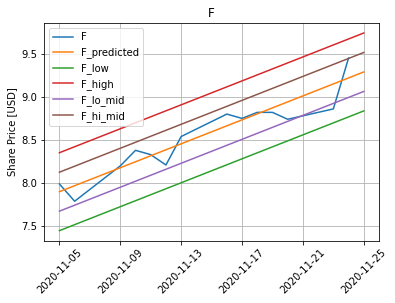

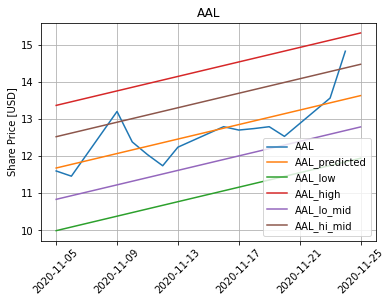

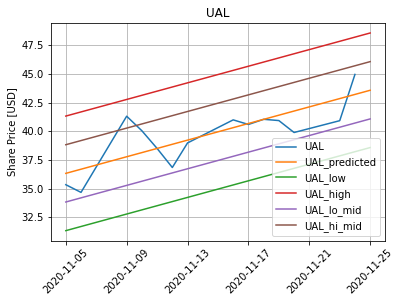

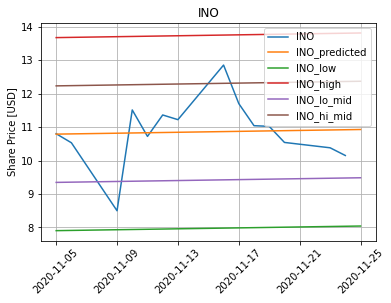

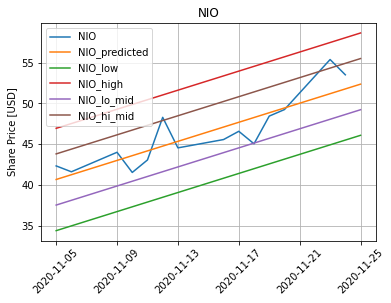

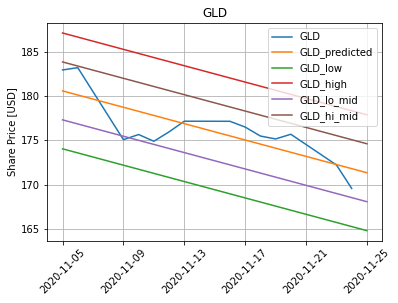

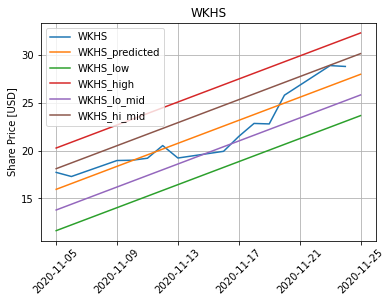

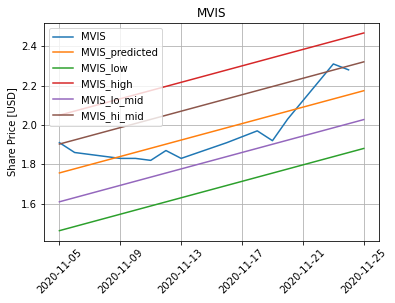

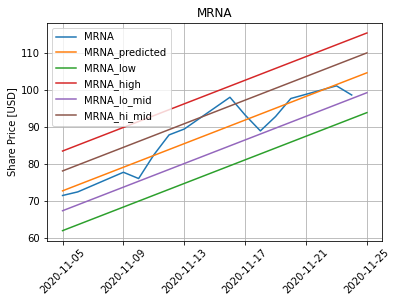

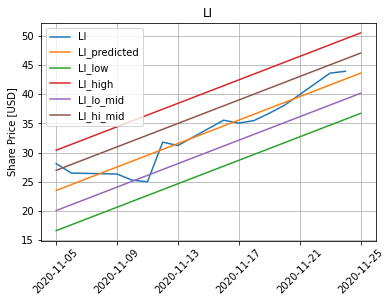

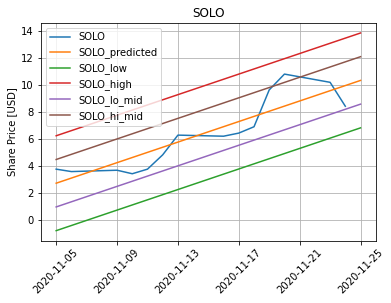

In [24]:
# Plot Open price vs. Time
num_plot=len(df.columns)
i=1
for item in df.columns:
    plt.figure()
    plt.plot(df_price[item])
    plt.plot(df_price_est_start_end[[item,item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid']])
    plt.legend([item,item+'_predicted',item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid'])
    plt.ylabel('Share Price [USD]')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.title(item)
    i=i+1

## Constructing the Portfolio

In order to balance the investments, we'd want to have the most benefit (reward) while minimizing volatility (risk).<br>
1. We can consider 'reward' to be the slope of the linear fit to share price (higher the slope, higher the gain).<br>
2. We can consider 'risk' to be the ratio between the price bounds and change in price over the duration of interest <br>
3. Hence we can compute a 'returns ratio' = 'reward'/'risk' for each listing; the higher this value, the more this investment is viable. <br>
4. Then we can compute the sum of the returns ratios for each listing and divide the returns ratio by the summed value, to determine the "weight" of each investment <br>
5. Finally we can multiply the "weight" by the total investment capital (total_investment) to obtain the recommended investment for each listing <br>    

### Use the Linear Regression object to construct the reward, volatility, returns ratio, weight and suggested investment values

In [25]:
# Initialize the portfolio dataframe df_portfolio and update the index suitably
df_portfolio=df_price_est_obj
df_portfolio=df_portfolio.reindex(['reward','risk','returns_ratio','weight','suggested_investment'])
df_portfolio=df_portfolio.rename_axis(index='Parameters')

# Update "reward" using the slope of the line fit (multiplied by a suitable factor for display)
for item in (df_portfolio.columns):
    df_portfolio.loc['reward',item]=(df_price_est_obj.loc['fit_obj',item].coef_[0])*10**17
    
# Update the "volatility" as the ratio of the price bounds to the absolute net price change over the duration
for item in (df_portfolio.columns):
    df_portfolio.loc['risk',item]=(df_price_est_obj.loc['bounds',
                                                              item])/abs(df_price_est_start_end.loc[df_price_est_start_end.index[-1],
                                                                                                 item]-
                                         df_price_est_start_end.loc[df_price_est_start_end.index[0],
                                                                    item])
                                         
# Update the returns ratio as the ratio between the "reward" and "volatility"
for item in (df_portfolio.columns):
    df_portfolio.loc['returns_ratio',item]=(df_portfolio.loc['reward',item]/
                                            df_portfolio.loc['risk',item])
    
# Remove those listings with negative returns_ratio since those imply a falling stock
for item in df_portfolio.columns:
    if df_portfolio.loc['reward',item]<=0:
        df_portfolio.pop(item)
        
# Obtain the weighted average of the returns ratio for each listing
for item in (df_portfolio.columns):
    df_portfolio.loc['weight',item]=df_portfolio.loc['returns_ratio',item]/df_portfolio.loc['returns_ratio',:].sum()

# Multiply the weight of each listing by the total investment capital to obtain the recommended investment
for item in (df_portfolio.columns):
    df_portfolio.loc['suggested_investment',item]=df_portfolio.loc['weight',item]*total_investment

# Display the portfolio dataframe
df_portfolio.style.background_gradient(axis=1).format("{:.2f}")

,PYPL,TSLA,FCAU,F,AAL,UAL,INO,NIO,WKHS,MVIS,MRNA,LI,SOLO
Parameters,,,,,,,,,,,,,
reward,105.60,1593.72,998.42,1005.19,971.20,1185.76,73.99,1595.67,3922.18,1265.73,2575.21,4152.29,11684.72
risk,5.69,0.74,0.27,0.33,0.87,0.69,20.87,0.54,0.36,0.70,0.34,0.34,0.46
returns_ratio,18.57,2156.62,3668.55,3088.78,1122.54,1720.04,3.54,2973.21,10919.18,1802.47,7635.32,12106.40,25315.18
weight,0.00,0.03,0.05,0.04,0.02,0.02,0.00,0.04,0.15,0.02,0.11,0.17,0.35
suggested_investment,1.54,178.46,303.58,255.60,92.89,142.34,0.29,246.04,903.58,149.16,631.83,1001.82,2094.87


In [26]:
df_portfolio.to_csv('portfolio.csv')

### What kind of volatility do the listings have?

 Refer the "volatility" row, higher the value, greater the volatility

### How do we use the data to construct our portfolio?

Refer the dataframe "df_portfolio"